In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


Read files using Panda

In [ ]:
SampleSuperstore=list(uploaded.keys())[0]
df=pd.read_csv(SampleSuperstore)
print(df)

           Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Categ

2.Displaying first few rows

In [ ]:
print('First few rows: ')
print(df.head)
df.info()

First few rows: 
<bound method NDFrame.head of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

    

3.Checking and Handling Missing values

In [ ]:
df['Sales']=df['Sales'].fillna(0) #Filling missing values
df['Profit']=df['Profit'].fillna(0)
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

4.Removing Duplicates

In [ ]:
df=df.drop_duplicates()

# **Data Cleaning**

1.Converting the Postal column to a String datatype

In [ ]:
df['Postal Code'] = df['Postal Code'].astype(str)

2.Extracting 'City' and 'State' columns into a new column called 'Location' by combining them.

In [ ]:
cols = ['City', 'State']
df['Location'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print(df['Location'])


0            Henderson_Kentucky
1            Henderson_Kentucky
2        Los Angeles_California
3       Fort Lauderdale_Florida
4       Fort Lauderdale_Florida
                 ...           
9989              Miami_Florida
9990      Costa Mesa_California
9991      Costa Mesa_California
9992      Costa Mesa_California
9993     Westminster_California
Name: Location, Length: 9977, dtype: object


# **Data Analysis**


Total Sales

In [ ]:
total_sales=df['Sales'].sum()
print('Total Sales: ',total_sales)


Total Sales:  2296195.5903


Total Profit


In [ ]:
total_profit=df['Profit'].sum()
print("Total Profit: ",total_profit)

Total Profit:  286241.4226


Average Discount

In [ ]:
avg_disc=df['Discount'].mean()
print("Average Discount: ",avg_disc)

Average Discount:  0.1562784404129498


2.Identifying top 10 products by Sales

In [ ]:
df.nlargest(10,'Sales')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Location
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,Jacksonville_Florida
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,Lafayette_Indiana
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,Seattle_Washington
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,New York City_New York
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,Newark_Delaware
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,Detroit_Michigan
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,Minneapolis_Minnesota
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,Lakewood_New Jersey
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,Arlington_Virginia
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,Philadelphia_Pennsylvania


3.Region with the Highest Profit

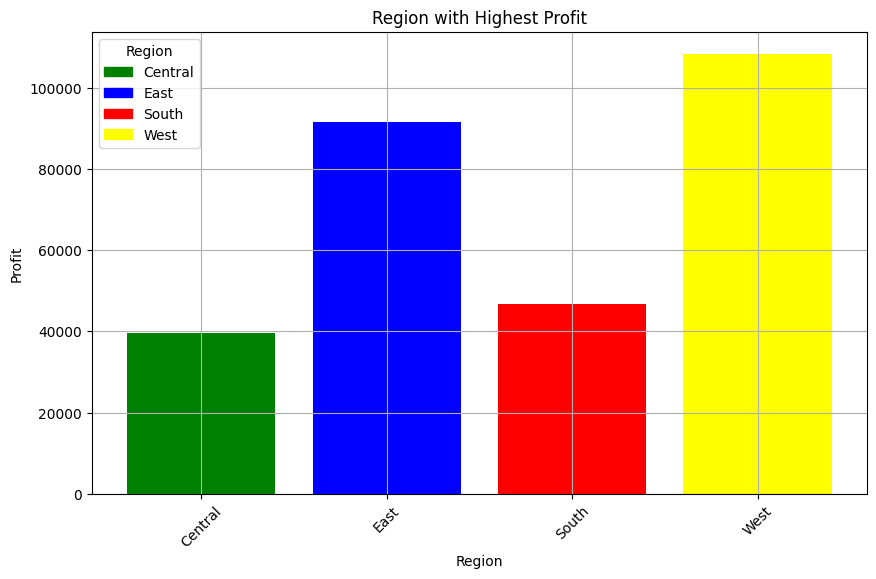

In [ ]:
if 'Region' in df.columns:
  Region_Profit=df.groupby('Region')['Profit'].sum()
  plt.figure(figsize=(10,6))
  bars=plt.bar(Region_Profit.index,Region_Profit.values,color=['green','blue','red','yellow'])
  plt.title('Region with Highest Profit')
  plt.xlabel('Region')
  plt.ylabel('Profit')
  plt.xticks(rotation=45)
  plt.grid(True)
  region_color={'Central':'green','East':'blue','South':'red','West':'yellow'}
  handles=[plt.Rectangle((0,0),1,1,color=region_color[region]) for region in Region_Profit.index]
  labels=list(Region_Profit.index)
  plt.legend(handles,labels,title='Region')
  plt.show()


3.Analysing the sales and profit by product and sub-product category

In [ ]:
#Analysing the sales and profit by product category and sub-category.
Category_group=df.groupby(['Category','Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
print(Category_group)


           Category Sub-Category        Sales      Profit
0         Furniture    Bookcases  114879.9963  -3472.5560
1         Furniture       Chairs  327777.7610  26567.1278
2         Furniture  Furnishings   91683.0240  13052.7230
3         Furniture       Tables  206965.5320 -17725.4811
4   Office Supplies   Appliances  107532.1610  18138.0054
5   Office Supplies          Art   27107.0320   6524.6118
6   Office Supplies      Binders  203409.1690  30228.0003
7   Office Supplies    Envelopes   16476.4020   6964.1767
8   Office Supplies    Fasteners    3024.2800    949.5182
9   Office Supplies       Labels   12444.9120   5526.3820
10  Office Supplies        Paper   78224.1420  33944.2395
11  Office Supplies      Storage  223843.6080  21278.8264
12  Office Supplies     Supplies   46673.5380  -1189.0995
13       Technology  Accessories  167380.3180  41936.6357
14       Technology      Copiers  149528.0300  55617.8249
15       Technology     Machines  189238.6310   3384.7569
16       Techn

#**Data Visualisation**

1.Perform a correlation analysis between numerical columns.

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000


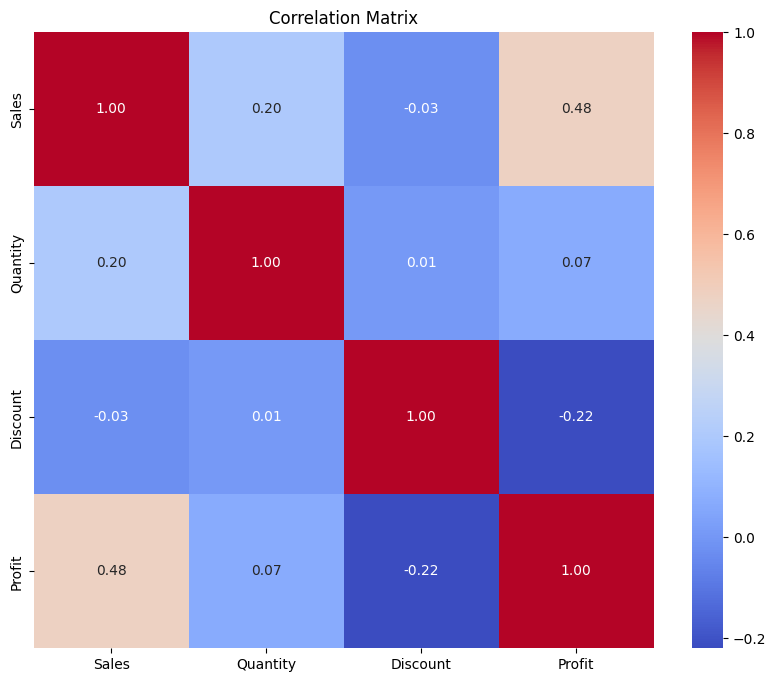

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
# Display the correlation matrix
print(correlation_matrix)
# correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

2.Using Pivot table to summarize sales and profit by region and customer segment.

In [ ]:

# Create the pivot table
pivot_table = pd.pivot_table(df, values=['Sales','Profit'], index=['Region', 'Segment'], aggfunc='sum')

# Display the pivot table
print(pivot_table)

                         Profit        Sales
Region  Segment                             
Central Consumer      8512.7670  251593.5120
        Corporate    18704.6958  157976.6968
        Home Office  12438.4124   91212.6440
East    Consumer     41167.8979  350859.0470
        Corporate    23622.5789  200409.3470
        Home Office  26715.8324  127166.8020
South   Consumer     26913.5728  195580.9710
        Corporate    15215.2232  121885.9325
        Home Office   4620.6343   74255.0015
West    Consumer     57413.2036  362799.2450
        Corporate    34412.4819  225798.1545
        Home Office  16504.1224  136658.2370


3.Identifying any outliers in the sales data using box plots.

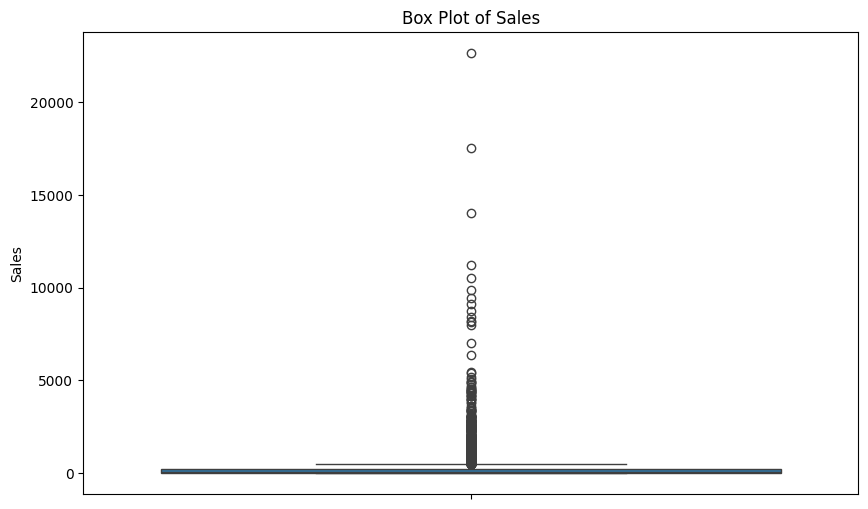

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# **Report on the Analysis**


 **Objectives**: The purpose of analysising data of the given data set is for **Decison Making**,**Performance Evaluation**,**Predictive Modelling**,**Risk Assessment**,**Customer Insights**.

**Data Collection & Analysis Technique**For this analysis a csv files is used to derive the data. Then, the dataset is scanned for missing values and potential duplicate values are removed.The libraries that aided this analysis were Pandas,Matplotlib and seaborn.
The dataset has been loaded to DataFrame in python and has been plotted to specified or necessary charts or graphs as per requirement.


**Interesting patterns or insights with Visualisation:**

1.The West region has the highest total profit, while the
Central region has the lowest.
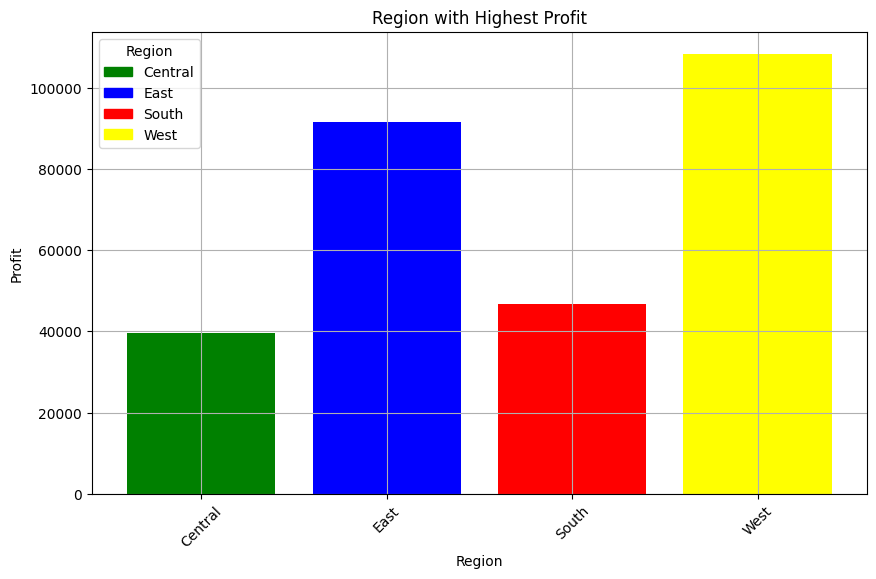





















2.The analysis of sales and profit by product category and sub-category shows that Technology has the highest sales and profit, followed by Furniture and Office Supplies.

3.The correlation analysis shows that there is a strong positive correlation between Sales and Profit.
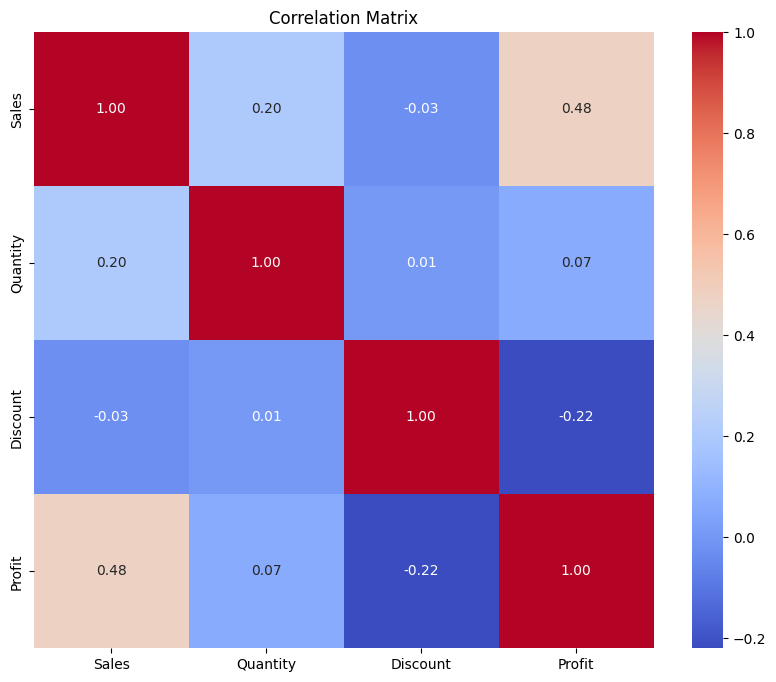


4.The pivot table shows that the Consumer segment has the highest sales and profit in all regions.

5.The box plot shows that there are some outliers in the sales data.
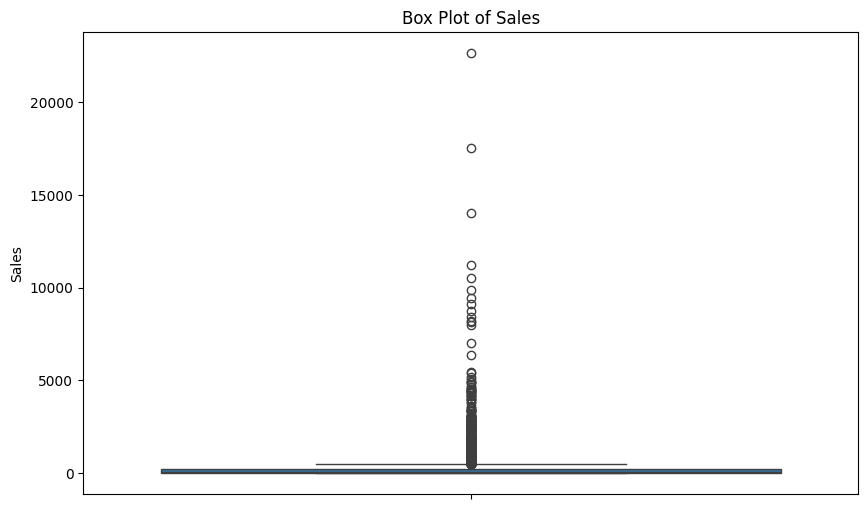

